In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [313]:
df=pd.read_csv("Fraud5.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Basic information about the Dataset.

In [314]:
df.shape

(6362620, 11)

In [315]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [317]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [318]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [319]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [320]:
#to get the actual values of the exponential
pd.set_option('display.float_format', '{:.2f}'.format)

In [321]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.00,243.40,142.33,1.00,156.00,239.00,335.00,743.00
amount,6362620.00,179861.90,603858.23,0.00,13389.57,74871.94,208721.48,92445516.64
oldbalanceOrg,6362620.00,833883.10,2888242.67,0.00,0.00,14208.00,107315.18,59585040.37
newbalanceOrig,6362620.00,855113.67,2924048.50,0.00,0.00,0.00,144258.41,49585040.37
oldbalanceDest,6362620.00,1100701.67,3399180.11,0.00,0.00,132705.66,943036.71,356015889.35
newbalanceDest,6362620.00,1224996.40,3674128.94,0.00,0.00,214661.44,1111909.25,356179278.92
isFraud,6362620.00,0.00,0.04,0.00,0.00,0.00,0.00,1.00
isFlaggedFraud,6362620.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [322]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [323]:
df.drop_duplicates()
#there is no duplicates are present in this dataset.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [324]:
#checking the correlation for each variable to the target variable.
df.corr()['isFraud']

step              0.03
amount            0.08
oldbalanceOrg     0.01
newbalanceOrig   -0.01
oldbalanceDest   -0.01
newbalanceDest    0.00
isFraud           1.00
isFlaggedFraud    0.04
Name: isFraud, dtype: float64

In [325]:
df.corr()['isFraud'].sort_values()

newbalanceOrig   -0.01
oldbalanceDest   -0.01
newbalanceDest    0.00
oldbalanceOrg     0.01
step              0.03
isFlaggedFraud    0.04
amount            0.08
isFraud           1.00
Name: isFraud, dtype: float64

<AxesSubplot:>

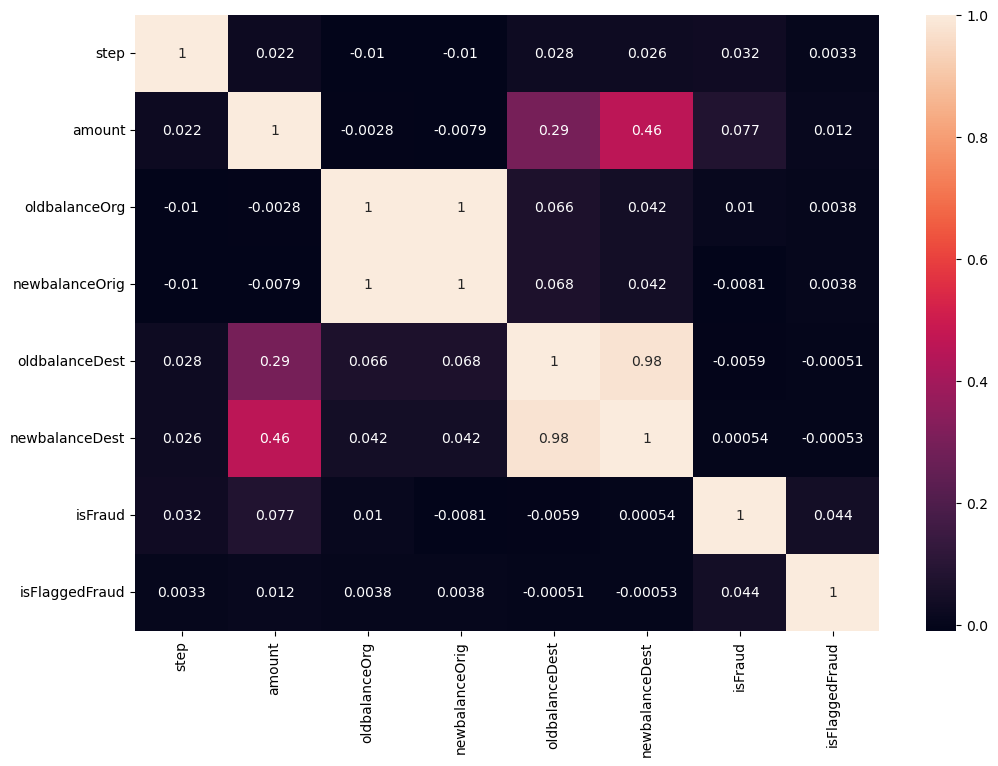

In [326]:
#Heatmap of correlation of the variables.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

C:\Users\91951\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

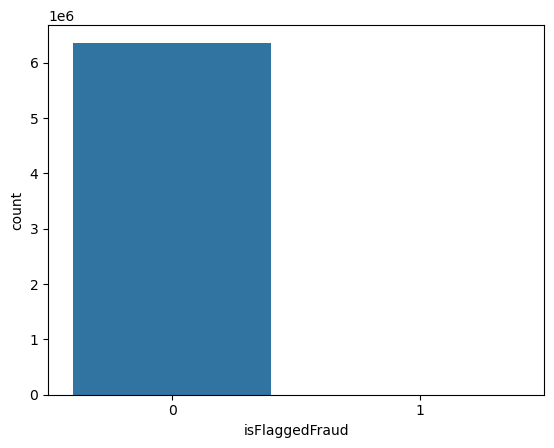

In [327]:
sns.countplot(df['isFlaggedFraud'])

In [328]:
df1=df.copy()

In [329]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Data Analysis 

In [330]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\91951\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

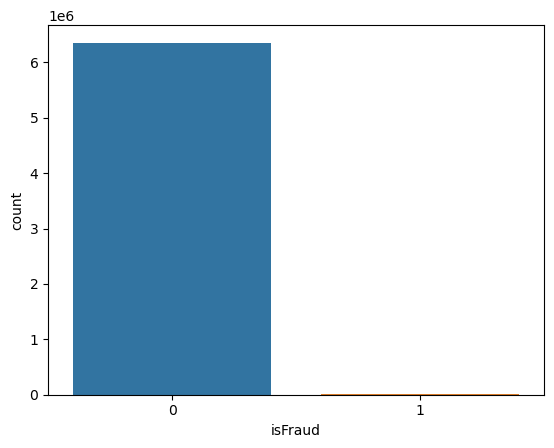

In [331]:
sns.countplot(df['isFraud'])

In [332]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

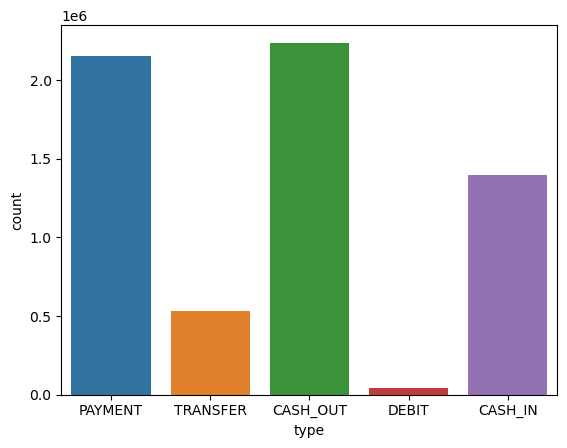

In [333]:
sns.countplot(x='type',data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

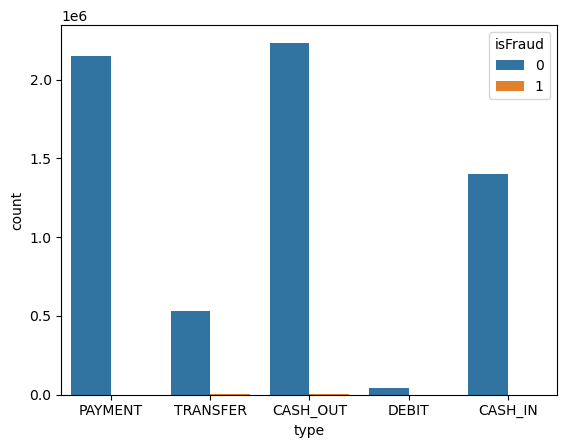

In [334]:
sns.countplot(x='type',data=df,hue='isFraud')

In [335]:
df2=df1.copy()
df3=df1.copy()

## Basically we identifying the transaction is Fraud only when trying to empty the account or when the newbalance of the orign.

In [336]:
df2.loc[df2['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Data preprocessing.

In [337]:
df1.loc[df1['amount']>df1['oldbalanceOrg']]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.00,0.00,M801569151,0.00,0.00,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
16,1,PAYMENT,1563.82,C761750706,450.00,0.00,M1731217984,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362316,718,PAYMENT,1022.91,C1203084509,12.00,0.00,M675916850,0.00,0.00,0,0
6362317,718,CASH_OUT,317177.48,C857156502,170.00,0.00,C784108220,345042.13,662219.61,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.00,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.00,0.00,C1515639522,24893.67,211167.51,0,0


In [338]:
df1.drop(df1[df1['amount']>df1['oldbalanceOrg']].index,inplace=True)

In [339]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [340]:
df1['newbalanceOrig']=df1['oldbalanceOrg']-df1['amount']

In [341]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [342]:
df1['newbalanceDest']=df1['oldbalanceDest']+df1['amount']
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,9839.64,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,1864.28,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,181.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,21363.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,11668.14,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,6311409.28,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.12,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,850002.52,1,0


## Feature Engineering

In [343]:
#removing unwanted,not used and less important columns
df1.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [344]:
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,9839.64,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,1864.28,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,181.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,21363.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,6311409.28,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.12,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,850002.52,1


In [345]:
df1.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

## Encoding Categorical Variable 

In [346]:
# label encoding the variable which in categorical type.
from sklearn.preprocessing import LabelEncoder
lablencoder=LabelEncoder()
df1['type']=lablencoder.fit_transform(df1['type'])

In [347]:
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.00,160296.36,0.00,9839.64,0
1,1,3,1864.28,21249.00,19384.72,0.00,1864.28,0
2,1,4,181.00,181.00,0.00,0.00,181.00,1
3,1,1,181.00,181.00,0.00,21182.00,21363.00,1
4,1,3,11668.14,41554.00,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.00,0.00,6311409.28,1
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.12,1
6362618,743,4,850002.52,850002.52,0.00,0.00,850002.52,1


## ML AlGORITHM

## Desicion Tree

## Dividing the dataset into training and testing

In [349]:
xt=df1.drop(['step','isFraud'],1)
xt

C:\Users\91951\AppData\Local\Temp\ipykernel_5384\3587851129.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xt=df1.drop(['step','isFraud'],1)


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.00,160296.36,0.00,9839.64
1,3,1864.28,21249.00,19384.72,0.00,1864.28
2,4,181.00,181.00,0.00,0.00,181.00
3,1,181.00,181.00,0.00,21182.00,21363.00
4,3,11668.14,41554.00,29885.86,0.00,11668.14
...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,4,6311409.28,6311409.28,0.00,0.00,6311409.28
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.12
6362618,4,850002.52,850002.52,0.00,0.00,850002.52


In [350]:
y=df1[['isFraud']]
y

,isFraud
0,0
1,0
2,1
3,1
4,0
...,...
6362615,1
6362616,1
6362617,1
6362618,1


In [351]:
xt=pd.get_dummies(xt)
xt

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.00,160296.36,0.00,9839.64
1,3,1864.28,21249.00,19384.72,0.00,1864.28
2,4,181.00,181.00,0.00,0.00,181.00
3,1,181.00,181.00,0.00,21182.00,21363.00
4,3,11668.14,41554.00,29885.86,0.00,11668.14
...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,4,6311409.28,6311409.28,0.00,0.00,6311409.28
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.12
6362618,4,850002.52,850002.52,0.00,0.00,850002.52


In [352]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xt,y,test_size=0.3,random_state=1)

In [353]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [354]:
pred_cv_tree=tree_model.predict(x_test)
pred_cv_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Module Accuracy

In [355]:
score_tree =accuracy_score(pred_cv_tree,y_test)*100
score_tree

100.0

## Example output prediction

In [356]:
w=pd.read_csv('Fra1.csv')
prediction=tree_model.predict(w)
print(prediction)

[0 0 0 1 0]
